---
date: '2025-05-09T12:10:32+08:00'
title: 'SuRun Development Environment Setup'
---

## IDE
Since we are on Windows, the preferred compiler is Visual C++. You can install [Visual Studio][vs-install], it provides the compiler and an integrated editor.

Note that Visual Studio Community is free even for commericial use. See [License][vs-license] for more details.

If you prefer other editors, you can just install [Visual Studio Build Tools][vs-buildtools].

[vs-license]: https://visualstudio.microsoft.com/license-terms/vs2022-ga-community/
[vs-install]: https://visualstudio.microsoft.com/downloads/
[vs-buildtools]: https://visualstudio.microsoft.com/downloads/?q=build+tools#build-tools-for-visual-studio-2022

## installation details

In addiction to the standard "Desktop Development with C++", you need also install component **ATL** and **MFC**. This is true for both
Visual Studio Community and Visual Studio Build Tools.

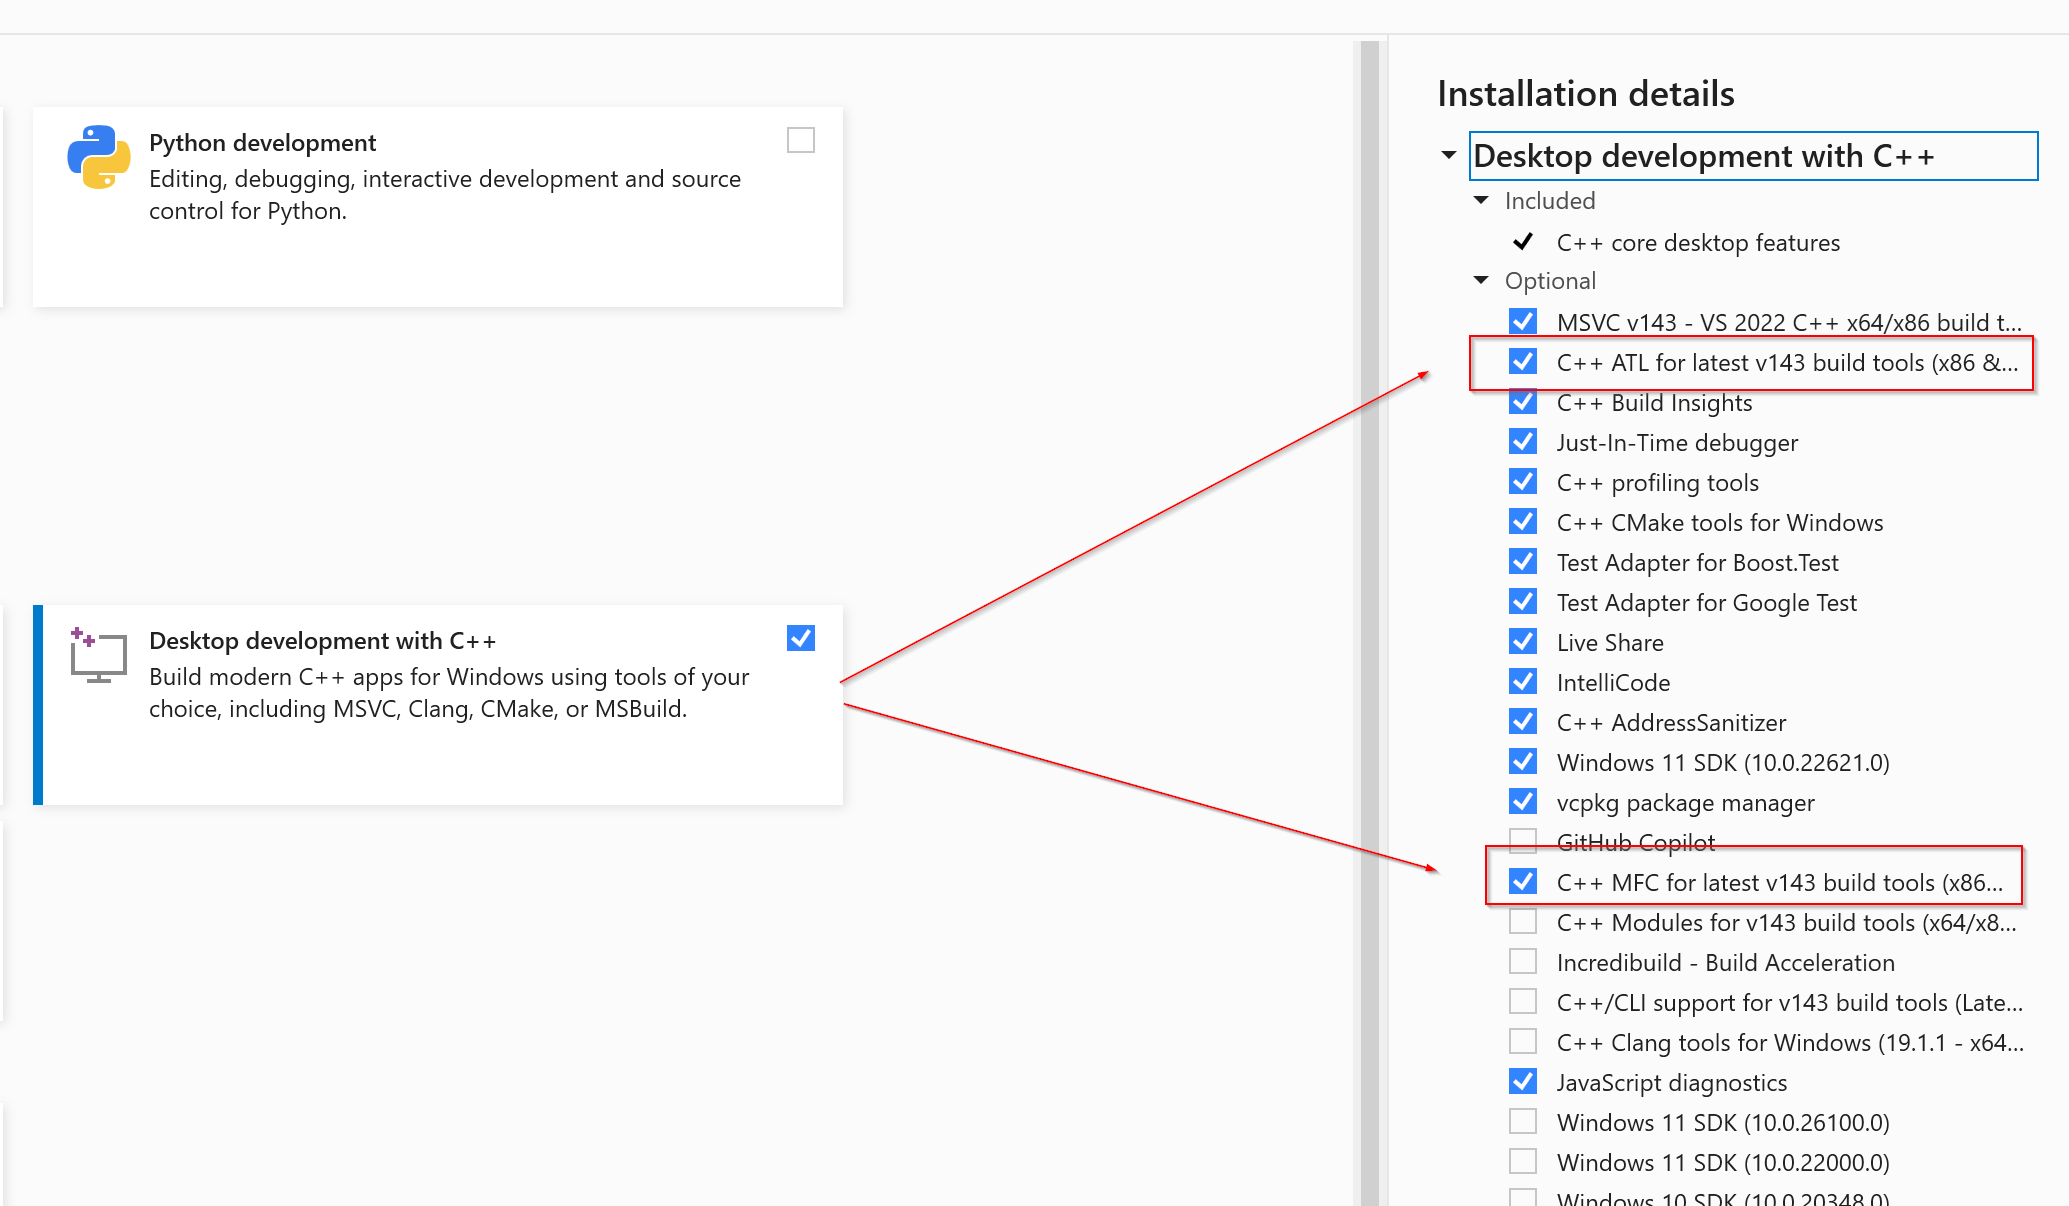

## Helper tools

SuRun use python for [build tools][build], icon preview, [file cleanup][clean], and [release on PYPI][pypi].

[build]: https://github.com/soda92/surun/blob/main/surun_tools/build.py
[clean]: https://github.com/soda92/surun/blob/main/surun_tools/clean.py
[pypi]: https://pypi.org/project/soda-surun/

You need to [install a Python][python]>=3.11, for editing Python code, I recommend installing [Visual Studio Code][vscode].

[python]: https://www.python.org/downloads/
[vscode]: https://code.visualstudio.com/

It will recommend appropriate extensions once you opened the project in VSCode, see [.vscode/extensions.json][1] for details.

[1]: https://github.com/soda92/surun/blob/main/.vscode/extensions.json

I recommend setting Pylance as the default language server, since it offers more tools and is faster.

```json
{
    "python.languageServer": "Pylance",
}
```

Note you cannot use Pylance in editor similar to VSCode, such as VSCodium and Cursor IDE, or Firebase Studio.

You can also use [scoop][scoop] for managing [Python versions][scoop-python]:

```pwsh
Set-ExecutionPolicy -ExecutionPolicy RemoteSigned -Scope CurrentUser
Invoke-RestMethod -Uri https://get.scoop.sh | Invoke-Expression
```

I use [uv][uv] for managing python packages. You can install it by following the link, or [install it from scoop][scoop-uv]:
```pwsh
scoop install uv
```

Once you have installed all the related tools, run `uv sync` to create a virtual environment and install depencies.
Then you need to activate the environment. In [PowerShell 7][pwsh7]:
```pwsh
./.venv/Scripts/Activate.ps1
```

[scoop]: https://scoop.sh/
[uv]: https://docs.astral.sh/uv/
[scoop-uv]: https://scoop.sh/#/apps?q=uv&id=c87cd05e439a709dd606f33735b30c7aa0a06ef6
[scoop-python]: https://scoop.sh/#/apps?q=python&id=2dcee5c280bcf909518d9074ed86f67c984f4db0
[pwsh7]: https://learn.microsoft.com/en-us/powershell/scripting/install/installing-powershell-on-windows?view=powershell-7.5

## Build step

in the virtual envionment, run `surun_build`. it will call the script [`scripts/build.ps1`][6]. The resulting binary is located at
`src/PC/Debug/InstallSuRun.exe`.

You can also use `surun_clean` to clean up the build directories.

Refer to [`.github/workflows/build.yml`][7] for a CI build.

[6]: https://github.com/soda92/surun/blob/main/scripts/build.ps1
[7]: https://github.com/soda92/surun/blob/main/.github/workflows/build.yml

## Editing the code

The Visual Studio solution is located at [`src/PC/SuRun.sln`][5]. Open it in Visual Studio, and you are ready to go.

[5]: https://github.com/soda92/surun/blob/main/src/PC/SuRun.sln

This project is using Microsoft-specific C++ extensions, such as `__try` and `__catch`, so you cannot use cygwin (MinGW/MSYS2) Gcc to build the project.

Also, I recommend you to disable `clangd` in VSCode if you choose to edit the C++ code in VSCode.
clangd relies on correct compiler database files, which you cannot provide when building using MSVC. If it was not present,
you will get many weird errors in VSCode for the C++ code, which hinders your ability to read the code.

## Updating program icons

The icons are located in `src/resources`. See [`src/resources/icon_meanings.md`][2] for an explanation for some of the icons.

[2]: https://github.com/soda92/surun/blob/main/src/resources/icon_meanings.md

The updated icons are edited using Krita and converted to ICO. You can use [this convenience tool][trayicons] for
previewing Krita icons in the taskbar.

[trayicons]: https://pypi.org/project/trayicons/